In [3]:
import json

with open("DeepAgro/datasets/test_fffb7fa69/annotations.json", "r") as f:
    data = json.load(f)

anotaciones = data["annotations"]
images = data["images"]
categories = data["categories"]

errores = []

print
for ann in anotaciones:
    seg = ann.get("segmentation")
    if not isinstance(seg, list):
        errores.append((ann["id"], "Segmentation no tiene una sola lista interna"))
    elif len(seg[0]) % 2 != 0:
        errores.append((ann["id"], "Cantidad impar de coordenadas"))
    elif len(seg[0]) < 6:
        errores.append((ann["id"], "Menos de 3 puntos (polígono no válido)"))

print(f"Se encontraron {len(errores)} anotaciones con problemas:")
for eid, desc in errores:
    print(f"  - ID {eid}: {desc}")


print("Len images: ",len(images))
print("Len categories: ",len(categories))
print("Len annotations: ",len(anotaciones))
print("promedio instancias por imagen: ",len(anotaciones)/len(images))

Se encontraron 0 anotaciones con problemas:
Len images:  18
Len categories:  1
Len annotations:  677
promedio instancias por imagen:  37.611111111111114


In [10]:
categories_1 = categories[0]
images_1 = images[0]
annotations_1 = anotaciones[0]

In [13]:
categories_1

{'id': 1,
 'name': 'corn',
 'supercategory': 'corn',
 'color': '#103fbe',
 'metadata': {},
 'keypoint_colors': []}

In [12]:
images_1

{'id': 8,
 'dataset_id': 5,
 'category_ids': [],
 'path': '/datasets/test_fffb7fa69/ffe43d10-beed-4383-9e1c-2a5809399606.jpg',
 'width': 1920,
 'height': 1080,
 'file_name': 'ffe43d10-beed-4383-9e1c-2a5809399606.jpg',
 'annotated': False,
 'annotating': [],
 'num_annotations': 0,
 'metadata': {},
 'deleted': False,
 'milliseconds': 0,
 'events': [],
 'regenerate_thumbnail': False}

In [11]:
annotations_1

{'id': 761,
 'image_id': 8,
 'category_id': 1,
 'segmentation': [[239.1,
   60.8,
   242.0,
   53.7,
   249.1,
   50.8,
   256.1,
   53.7,
   259.1,
   60.8,
   256.1,
   67.9,
   249.1,
   70.8,
   242.0,
   67.9]],
 'area': 284,
 'bbox': [239.0, 51.0, 20.0, 20.0],
 'iscrowd': False,
 'isbbox': False,
 'color': '#d1087e',
 'metadata': {}}

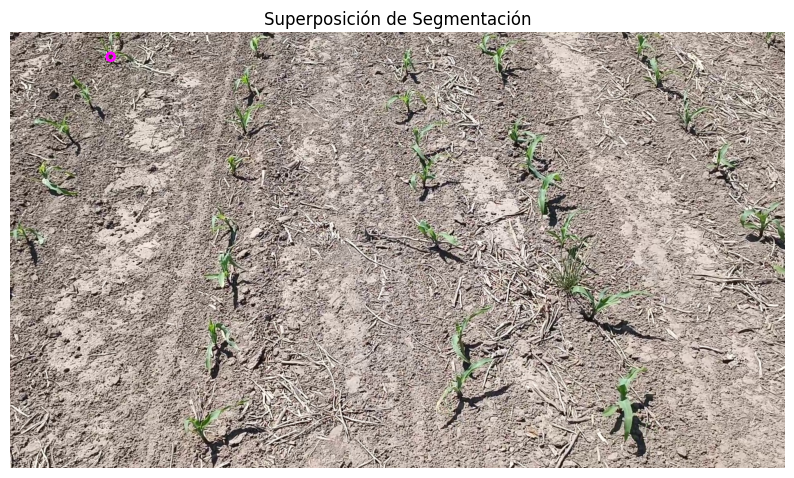

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.patches as patches
import os

# Datos
image_path = 'DeepAgro/datasets/test_fffb7fa69/ffe43d10-beed-4383-9e1c-2a5809399606.jpg'
segmentation = [[239.1, 60.8, 242.0, 53.7, 249.1, 50.8, 256.1, 53.7, 259.1, 60.8, 256.1, 67.9, 249.1, 70.8, 242.0, 67.9]]

# Aplanamos la lista de listas (por si hay más de un polígono)
polygon_points = np.array(segmentation[0]).reshape(-1, 2)

# Cargar imagen
image = Image.open(image_path)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image)
polygon = patches.Polygon(polygon_points, closed=True, edgecolor='magenta', facecolor='none', linewidth=2)
ax.add_patch(polygon)
ax.set_title('Superposición de Segmentación')
plt.axis('off')
plt.show()


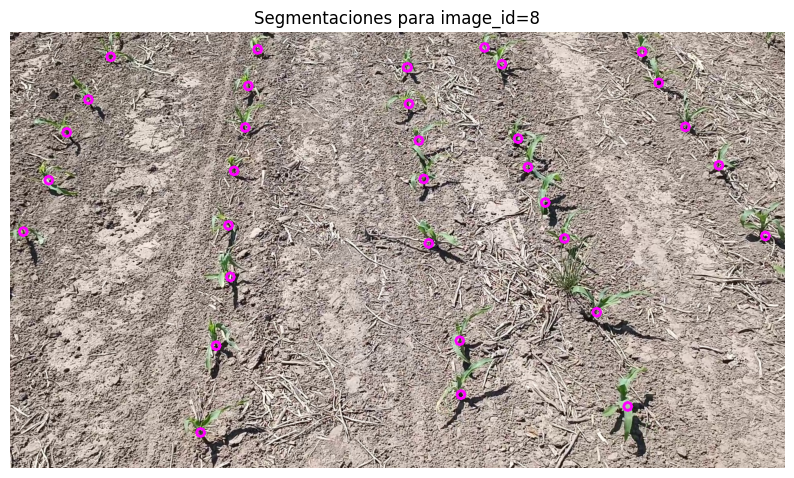

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.patches as patches

# ---------- INPUTS ----------
image_path = 'DeepAgro/datasets/test_fffb7fa69/ffe43d10-beed-4383-9e1c-2a5809399606.jpg'
image_id = 8  # ID de la imagen
all_annotations = anotaciones  # Lista con todos los diccionarios de anotaciones
# ----------------------------

# Filtrar anotaciones correspondientes a esta imagen
annotations_for_image = [ann for ann in all_annotations if ann['image_id'] == image_id]

# Cargar la imagen
image = Image.open(image_path)

# Mostrar imagen
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image)

# Dibujar cada polígono
for ann in annotations_for_image:
    for seg in ann['segmentation']:
        polygon_points = np.array(seg).reshape(-1, 2)
        polygon = patches.Polygon(
            polygon_points, 
            closed=True, 
            edgecolor='magenta', 
            facecolor='none', 
            linewidth=2
        )
        ax.add_patch(polygon)

ax.set_title(f'Segmentaciones para image_id={image_id}')
plt.axis('off')
plt.show()


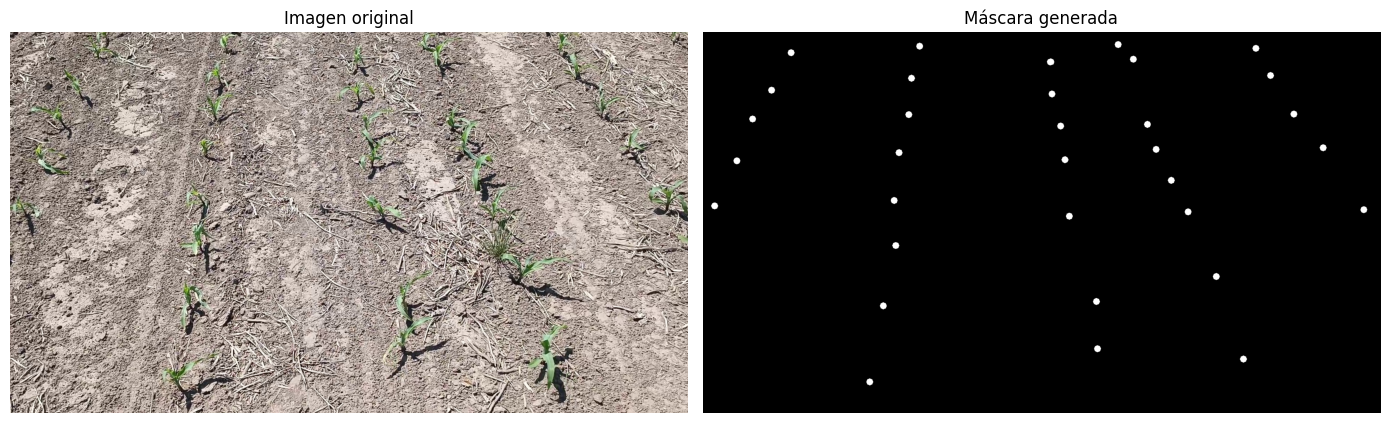

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.draw import polygon

# ---------- INPUTS ----------
image_path = 'DeepAgro/datasets/test_fffb7fa69/ffe43d10-beed-4383-9e1c-2a5809399606.jpg'
image_id = 8  # ID de la imagen
all_annotations = anotaciones  # Lista con todos los diccionarios de anotaciones
# ----------------------------

# Abrir imagen
image = Image.open(image_path)
width, height = image.size

# Crear máscara vacía
mask = np.zeros((height, width), dtype=np.uint8)

# Obtener anotaciones de esta imagen
annotations_for_image = [ann for ann in all_annotations if ann['image_id'] == image_id]

# Dibujar los polígonos en la máscara
for ann in annotations_for_image:
    for seg in ann['segmentation']:
        points = np.array(seg).reshape(-1, 2)
        rr, cc = polygon(points[:, 1], points[:, 0], shape=mask.shape)
        mask[rr, cc] = 1  # Marca como 1 en la máscara

# Mostrar imagen original y máscara
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].imshow(image)
axs[0].set_title("Imagen original")
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Máscara generada")
axs[1].axis('off')

plt.tight_layout()
plt.show()
